This is a project to analyze some features of the second hand houses in Beijing, China. In the data there are some information given by chinese not the english, I will present most of my work in english later.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline


In [2]:
# Here I import the second-hand house data and display the first two rows
#Some information is give by chinese since the data is strached from a chinese website online
lianjia_df = pd.read_csv('lianjia.csv')
display(lianjia_df.head(n=2))

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988


In [3]:
#Check the data
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


Here I find that the "Elevator" data lacks a lot, so I will not analyze this term.

In [4]:
lianjia_df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [5]:
# Add a feature named Perprice, which measures the price per m^2
df = lianjia_df.copy()
df['PerPrice'] = lianjia_df['Price']/lianjia_df['Size']

# Reposition
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Direction', 'Renovation', 'PerPrice', 'Price']
df = pd.DataFrame(df, columns = columns)


display(df.head(n=2))

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.40,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.75,705.0


Now I want to show how the average price differs from the Region in Beijing.

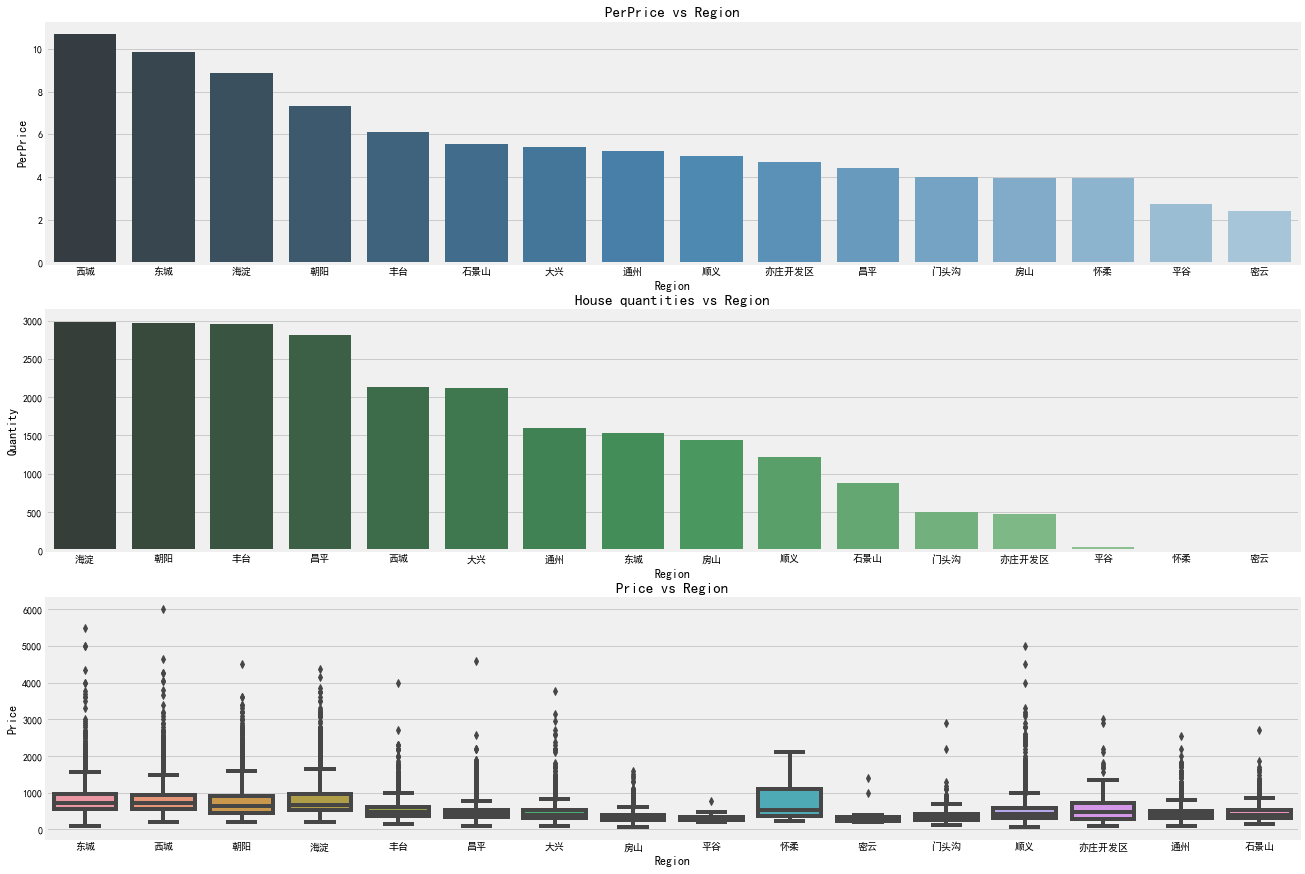

In [6]:
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()

f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x='Region', y='PerPrice', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_title('PerPrice vs Region',fontsize=15)
ax1.set_xlabel('Region')
ax1.set_ylabel('PerPrice')

sns.barplot(x='Region', y='Price', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_title('House quantities vs Region',fontsize=15)
ax2.set_xlabel('Region')
ax2.set_ylabel('Quantity')

sns.boxplot(x='Region', y='Price', data=df, ax=ax3)
ax3.set_title('Price vs Region',fontsize=15)
ax3.set_xlabel('Region')
ax3.set_ylabel('Price')

plt.show()

You can find that the average price in "西城"(West City) is the highest, because most good schools are positioned here.

In [7]:
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]

Here I want to make some data cleaning before my next step. I have to erase some significantly wrong results which are contained in the data.

In [ ]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
# Distribution of building time
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1)
# Building time with price
sns.regplot(x='Size', y='Price', data=df, ax=ax2)
plt.show()

The right figure implies that there are many oversized houses with relatively high price in the dataset.
Next, I will show the house type, just like the floor plan 2b2b or 3b2b in US.

In [ ]:
f, ax1= plt.subplots(figsize=(20,20))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('Floorplan',fontsize=15)
ax1.set_xlabel('Quantity')
ax1.set_ylabel('House type')
plt.show()

You can find that the 2 bedrooms and 1 living room floor plan is the most quantities in Beijing second hand houses trading market.

In [ ]:
grid = sns.FacetGrid(df, col='Renovation', palette='seismic',height=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()

You can find that the price of the second hand houses increases with the year, and the houses after 2000 are significantly more expensive than those are built before 2000.

And finally, I want to see the floor where the houses are.

In [ ]:
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='Floor', data=df, ax=ax1)
ax1.set_title('Floor vs Quantity',fontsize=15)
ax1.set_xlabel('Floor')
ax1.set_ylabel('Quantity')
plt.show()

Due to the graph, you can find that most second hand houses are positioned at floor 6.

In this project I only analyze the basic information given from the data. I want to conclude some features in the second hand house market in Beijing to help people to decide where and how much should a good second hand house be. If I can find more data I can do more on the relative research.